# HR Analytics Project- Understanding the Attrition in HR

In [158]:
#importing necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [159]:
#importing the dataset
df= pd.read_csv("/Users/user/Downloads/HR.csv",)

In [160]:
#displaying the 1st five rows of the data set
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [161]:
df.shape

(1470, 35)

The data set has 1470 rows and 35 columns

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [163]:
#check the data type of each columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Nine columns are of object type (categorical data)

In [164]:
#checking for missing values values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values

In [165]:
#statistical analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [166]:
# displaying column heads
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [167]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [168]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [169]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [170]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [171]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [172]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [173]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [174]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [175]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [176]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

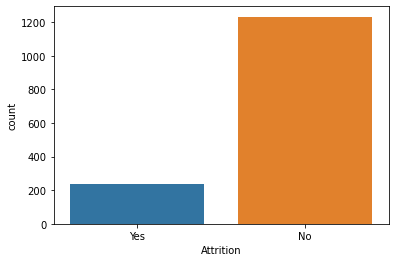

In [177]:
#let us see the distribution of the data
sns.countplot(x='Attrition',data=df)


Data seems imbalanced

### Data Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSub

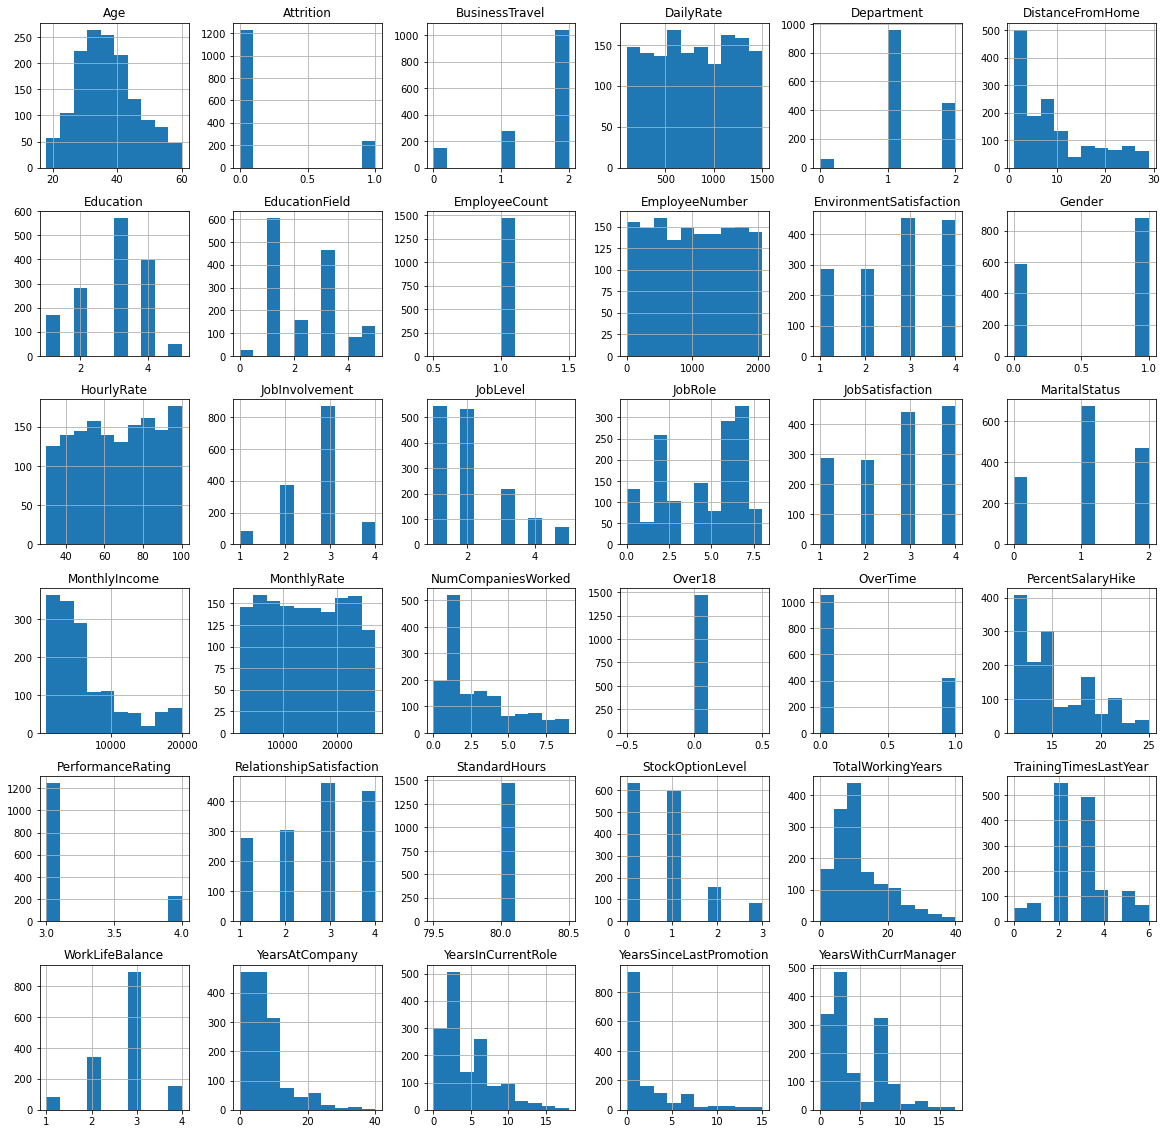

In [211]:
df.hist(figsize=(20,20),grid = True )

<AxesSubplot:>

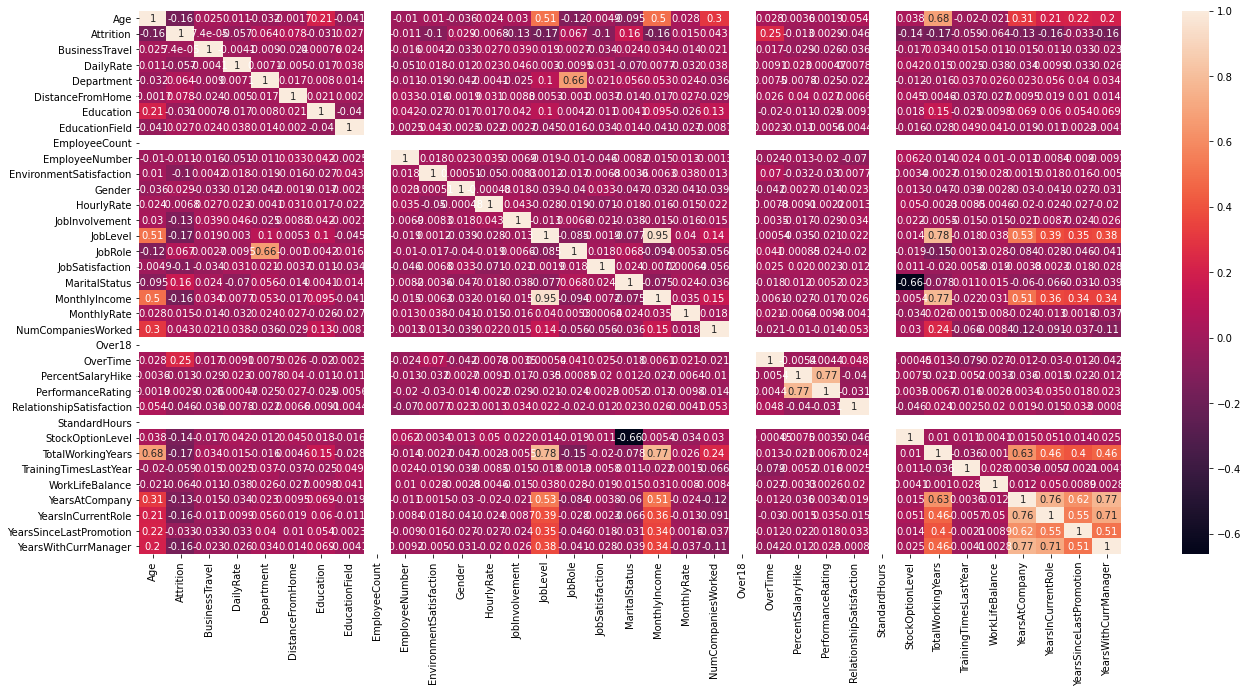

In [53]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot =True)

In [54]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [55]:
df.drop('Over18',axis=1,inplace=True)

In [56]:
df.drop('StandardHours',axis=1,inplace=True)

Above three are irrelevant column

<AxesSubplot:>

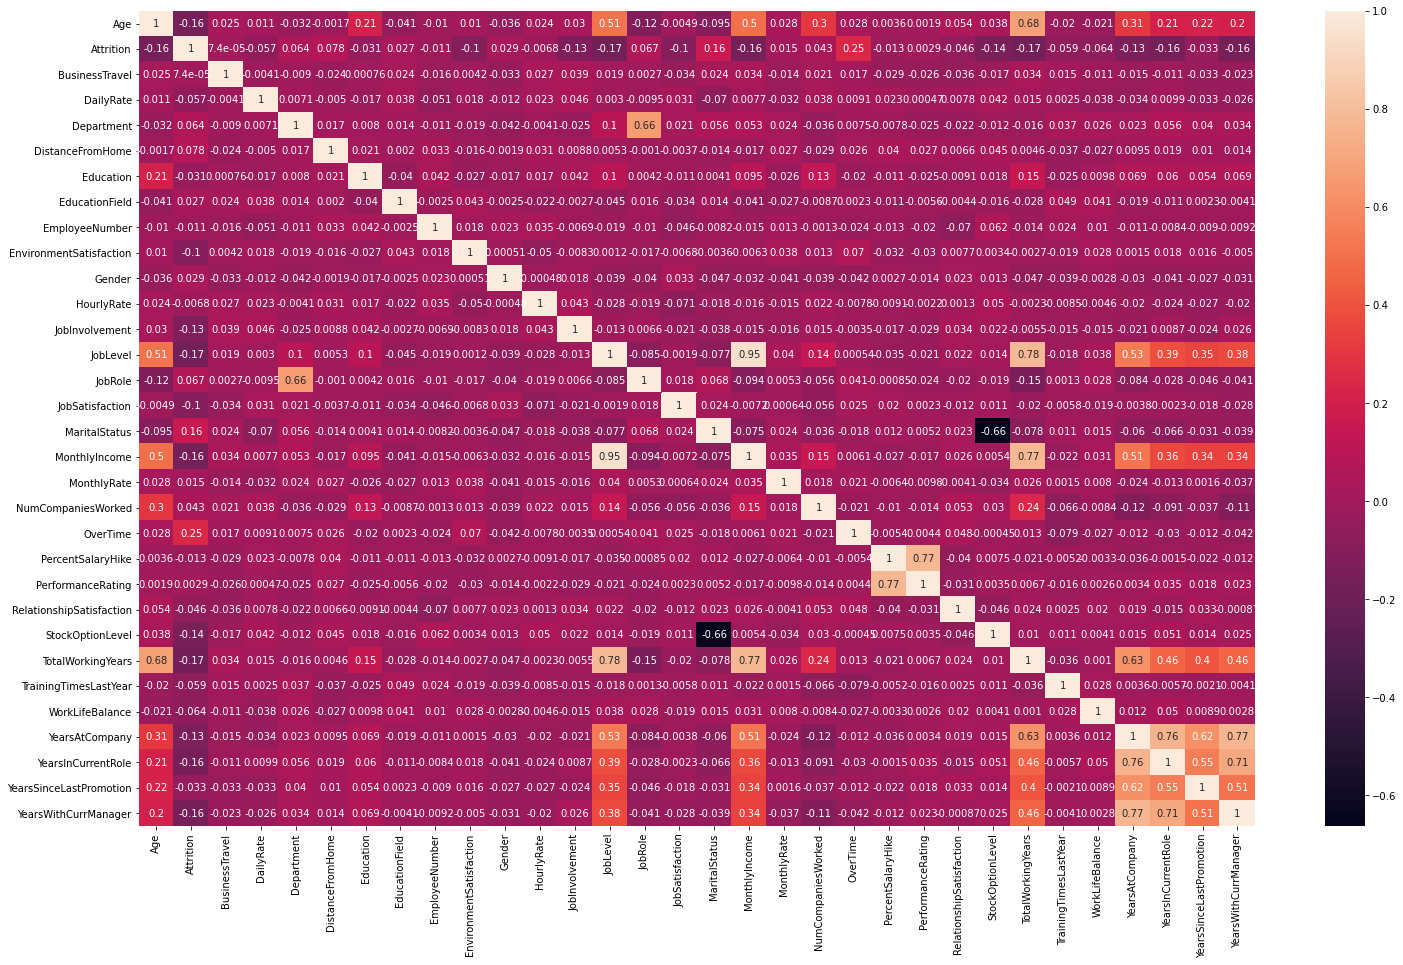

In [67]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot =True)

##### Let us see how attrition affects majority of the feature

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

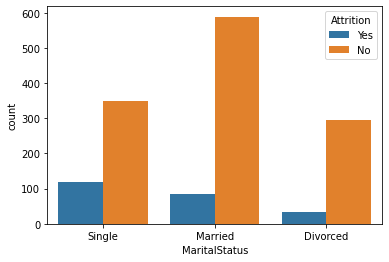

In [88]:
sns.countplot(x = "MaritalStatus",hue="Attrition",data = df)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

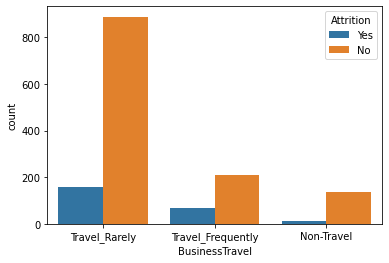

In [89]:
sns.countplot(x = "BusinessTravel",hue="Attrition",data = df)

<AxesSubplot:xlabel='Department', ylabel='count'>

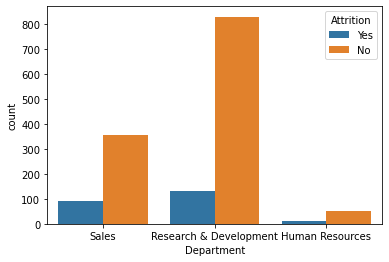

In [92]:
sns.countplot(x = "Department",hue="Attrition",data = df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

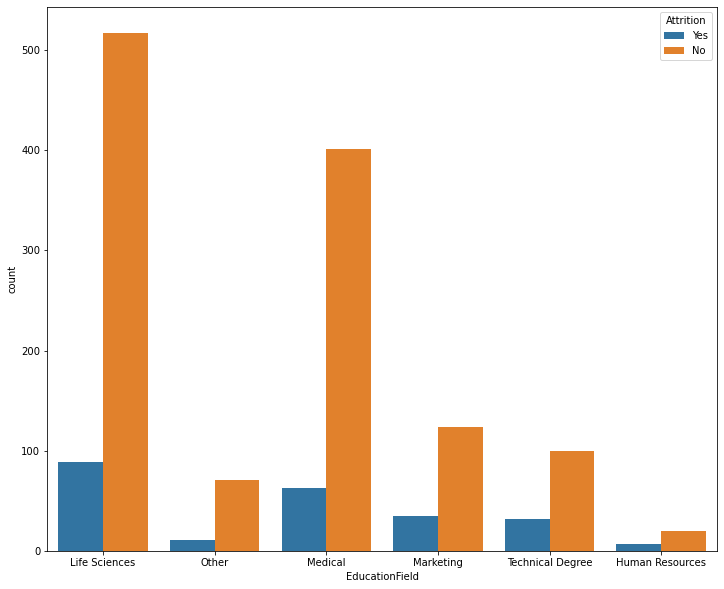

In [99]:
plt.figure(figsize=(12,10))
sns.countplot(x = "EducationField",hue="Attrition",data = df)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

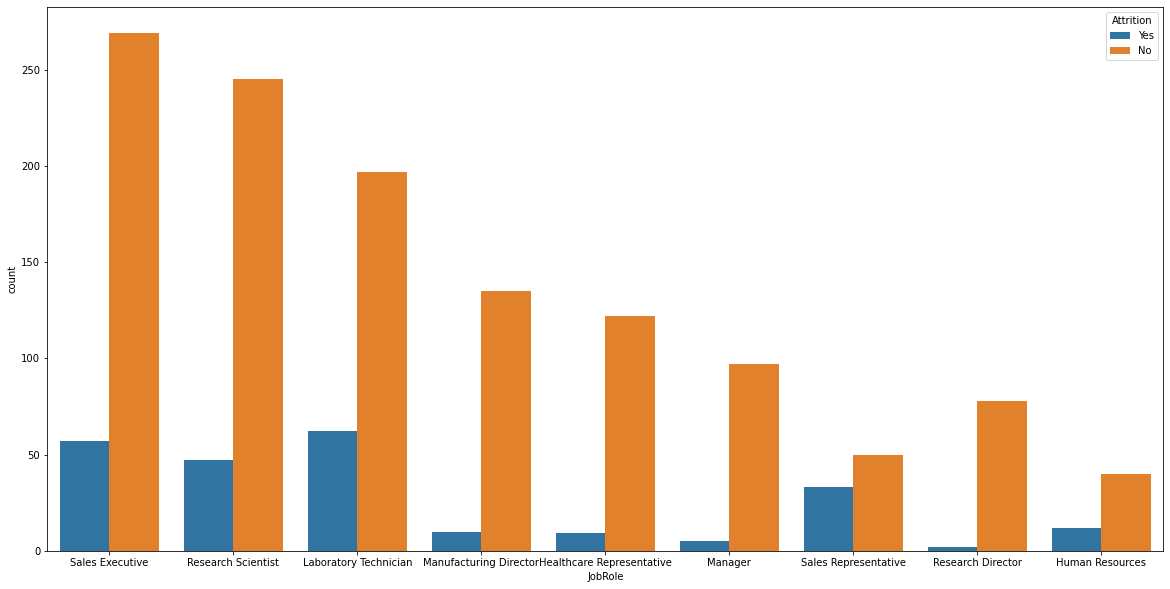

In [104]:
plt.figure(figsize=(20,10))
sns.countplot(x = "JobRole",hue="Attrition",data = df)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAJNCAYAAABqVV/fAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAA5q0lEQVR4nO3debwlZX0n/s+XRTCCRqR1FCRNCCoKBKXFuCWoTGQMghuCG+hkQvSnQRM10UkkBEMGI8ZRM+oYF9QhLIoYiEtUhLgREWQHNagtdkRFEhcMqODz+6Pqdh8u995+Lt13afv9fr3u69apU8tzanmqzqeeqlOttQAAAADA+myx1AUAAAAAYNMgSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKDLVktdgA2x4447tpUrVy51MQAAAAB+YVx00UXfa62tmOm9TTpIWrlyZS688MKlLgYAAADAL4yq+sZs77m1DQAAAIAugiQAAAAAugiSAAAAAOiyST8jCQAAAGAx/exnP8uaNWty8803L3VRNti2226bnXfeOVtvvXX3OIIkAAAAgE5r1qzJ9ttvn5UrV6aqlro4d1hrLTfccEPWrFmTXXfdtXs8t7YBAAAAdLr55ptzj3vcY5MOkZKkqnKPe9xj3i2rBEkAAAAA87Cph0hT7sjnECQBAAAAbCRnnnlmqipf+tKXkiSXXHJJPvzhD699/7zzzsvnPve5Wcc/66yzcsIJJyRJPvjBD+aqq65a+94xxxyTT3ziEwtU8j6CJAAAAICN5JRTTsmjHvWonHrqqUnmFyTdcsstOfjgg/OKV7wiye2DpOOOOy4HHHDAApZ+/aq1tqQF2BCrVq1qF1544VIXAwAAANhMXH311dljjz1mfO/GG2/M/e9//5x77rk5+OCDc9lll+XXfu3XctNNN2WnnXbKM57xjLz+9a/PlltumRUrVuRNb3pT3vGOd2SHHXbIxRdfnIc85CHZa6+9cuGFF+aZz3xmDjrooNztbnfL3e52t5xxxhl59atfnYMOOihPe9rTcs455+RlL3tZbrnlljz0oQ/NW97ylmyzzTZZuXJljjzyyJx99tn52c9+lve97315wAMeMK/PU1UXtdZWzTS8FkkAAAAAG8EHP/jBHHjggbnf/e6XHXbYIVdccUWOO+64HHbYYbnkkkvyJ3/yJ3n+85+fP/zDP8wll1ySRz/60UmSr3zlK/nEJz6R173udWun9YhHPCIHH3xwXvva1+aSSy7Jbrvttva9m2++Oc997nNz2mmn5fLLL88tt9ySt7zlLWvf33HHHfPFL34xL3jBC3LiiSdu1M8oSAIAAADYCE455ZQcfvjhSZLDDz88p5xyStd4hx56aLbccsvu+Xz5y1/Orrvumvvd735JkiOPPDKf+tSn1r7/lKc8JUmy7777ZvXq1d3T7bHVRp0aAAAAwGbohhtuyCc/+clcccUVqarceuutqar8xV/8xXrHvctd7jKvea3vMUXbbLNNkmTLLbfMLbfcMq9pr48WSQAAAAAb6P3vf3+OOOKIfOMb38jq1avzzW9+M7vuumuuvfba/OhHP1o73Pbbb3+b13OZbdgHPOABWb16da655pokyXvf+9781m/91sb5IOshSAIAAADYQKecckqe/OQn36bfU5/61Hz729/OVVddlX322SennXZanvjEJ+bMM8/MPvvsk09/+tNzTvPwww/Pa1/72jz4wQ/OV7/61bX9t91227zrXe/KoYcemr322itbbLFFnv/85y/I55rOr7YBAAAAdJrrV9s2RX61DQAAAIAFIUgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAYBPRWsujHvWofOQjH1nb7/TTT8+BBx64KPPfalHmAgAAAPALaN+Xv2ejTu+i1x4x5/tVlbe+9a059NBD85jHPCa33npr/vRP/zQf/ehHN2o5ZiNI2gRde9xeS12EjWKXYy5f6iIAAADAJmfPPffME5/4xLzmNa/Jj3/84zz72c/O8ccfn8svvzy33HJLjj322BxyyCG58sor87znPS8//elP8/Of/zxnnHFGdt999w2atyAJAAAAYBPz53/+53nIQx6SO93pTjnooIPy2Mc+Nu985zvz/e9/P/vtt18OOOCAvPWtb82LX/ziPOtZz8pPf/rT3HrrrRs8X0ESAAAAwCbmLne5Sw477LBst912Of3003P22WfnxBNPTJLcfPPNufbaa/Pwhz88xx9/fNasWZOnPOUpG9waKREkAQAAAGyStthii2yxxRZpreWMM87I/e9//9u8v8cee+RhD3tYPvShD+Xxj3983v72t+exj33shs1zg8YGAAAAYEk9/vGPz5ve9Ka01pIkF198cZLka1/7Wn71V381Rx99dA4++OBcdtllGzwvQRIAAADAJuxVr3pVfvazn2XvvffOnnvumVe96lVJktNOOy177rln9tlnn3zpS1/KEUfM/YtwPWoqrdoUrVq1ql144YVLXYxF51fbAAAAYGlcffXV2WOPPZa6GBvNTJ+nqi5qra2aaXgtkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAYBNSVXnpS1+69vWJJ56YY489dlHmvdWizAUAAADgF9C1x+21Uae3yzGXr3eYbbbZJh/4wAfyyle+MjvuuONGnf/6aJEEAAAAsAnZaqutctRRR+X1r3/97d77xje+kcc97nHZe++987jHPS7XXnvtRp23IAkAAABgE/PCF74wJ598cn7wgx/cpv+LXvSiHHHEEbnsssvyrGc9K0cfffRGna8gCQAAAGATc9e73jVHHHFE3vjGN96m//nnn59nPvOZSZLnPOc5+cxnPrNR5ytIAgAAANgEveQlL8k73vGO/PjHP551mKraqPMUJAEAAABsgnbYYYc8/elPzzve8Y61/R7xiEfk1FNPTZKcfPLJedSjHrVR5ylIAgAAANhEvfSlL833vve9ta/f+MY35l3velf23nvvvPe9780b3vCGjTq/rTbq1AAAAAA2I7scc/miz/PGG29c232ve90r//mf/7n29cqVK/PJT35yweatRRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAMA+ttaUuwkZxRz6HIAkAAACg07bbbpsbbrhhkw+TWmu54YYbsu22285rPL/aBgAAANBp5513zpo1a3L99dcvdVE22Lbbbpudd955XuMIkgAAAAA6bb311tl1112XuhhLxq1tAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdFixIqqr7VtW5VXV1VV1ZVS8e+x9bVf9WVZeMf0+YGOeVVXVNVX25qh6/UGUDAAAAYP4W8lfbbkny0tbaF6tq+yQXVdXHx/de31o7cXLgqnpgksOTPCjJfZJ8oqru11q7dQHLCAAAAECnBWuR1Fq7rrX2xbH7R0muTrLTHKMckuTU1tpPWmtfT3JNkv0WqnwAAAAAzM+iPCOpqlYmeXCSz4+9XlRVl1XVO6vq7mO/nZJ8c2K0NZk7eAIAAABgES14kFRV2yU5I8lLWms/TPKWJLsl2SfJdUleNzXoDKO3GaZ3VFVdWFUXXn/99QtTaAAAAABuZ0GDpKraOkOIdHJr7QNJ0lr7Tmvt1tbaz5P8XdbdvrYmyX0nRt85ybemT7O19rbW2qrW2qoVK1YsZPEBAAAAmLCQv9pWSd6R5OrW2t9M9L/3xGBPTnLF2H1WksOrapuq2jXJ7kkuWKjyAQAAADA/C/mrbY9M8pwkl1fVJWO//5nkGVW1T4bb1lYn+f0kaa1dWVWnJ7kqwy++vdAvtgEAAAAsHwsWJLXWPpOZn3v04TnGOT7J8QtVJgAAAADuuEX51TYAAAAANn2CJAAAAAC6CJIAAAAA6CJIAgAAAKDLQv5qG7ARXHvcXktdhI1il2MuX+oiAAAAsIG0SAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAuCxYkVdV9q+rcqrq6qq6sqheP/Xeoqo9X1b+O/+8+Mc4rq+qaqvpyVT1+ocoGAAAAwPwtZIukW5K8tLW2R5LfSPLCqnpgklckOae1tnuSc8bXGd87PMmDkhyY5M1VteUClg8AAACAeViwIKm1dl1r7Ytj94+SXJ1kpySHJHn3ONi7kzxp7D4kyamttZ+01r6e5Jok+y1U+QAAAACYn0V5RlJVrUzy4CSfT3Kv1tp1yRA2JbnnONhOSb45MdqasR8AAAAAy8CCB0lVtV2SM5K8pLX2w7kGnaFfm2F6R1XVhVV14fXXX7+xigkAAADAeixokFRVW2cIkU5urX1g7P2dqrr3+P69k3x37L8myX0nRt85ybemT7O19rbW2qrW2qoVK1YsXOEBAAAAuI2F/NW2SvKOJFe31v5m4q2zkhw5dh+Z5B8m+h9eVdtU1a5Jdk9ywUKVDwAAAID52WoBp/3IJM9JcnlVXTL2+59JTkhyelX9bpJrkxyaJK21K6vq9CRXZfjFtxe21m5dwPIBAAAAMA8LFiS11j6TmZ97lCSPm2Wc45Mcv1BlAgAAAOCOW5RfbQMAAABg07eQt7YBME/XHrfXUhdho9jlmMuXuggAAMAC0CIJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC4LFiRV1Tur6rtVdcVEv2Or6t+q6pLx7wkT772yqq6pqi9X1eMXqlwAAAAA3DEL2SLppCQHztD/9a21fca/DydJVT0wyeFJHjSO8+aq2nIBywYAAADAPC1YkNRa+1SSf+8c/JAkp7bWftJa+3qSa5Lst1BlAwAAAGD+luIZSS+qqsvGW9/uPvbbKck3J4ZZM/YDAAAAYJlY7CDpLUl2S7JPkuuSvG7sXzMM22aaQFUdVVUXVtWF119//YIUEgAAAIDbW9QgqbX2ndbara21nyf5u6y7fW1NkvtODLpzkm/NMo23tdZWtdZWrVixYmELDAAAAMBaixokVdW9J14+OcnUL7qdleTwqtqmqnZNsnuSCxazbAAAAADMbauFmnBVnZJk/yQ7VtWaJH+eZP+q2ifDbWurk/x+krTWrqyq05NcleSWJC9srd26UGUDAAAAYP4WLEhqrT1jht7vmGP445Mcv1DlAQAAAGDDdN3aVlXn9PQDAAAA4BfXnC2SqmrbJL+U4fa0u2fdr6vdNcl9FrhsAAAAACwj67u17feTvCRDaHRR1gVJP0zyfxauWAAAAAAsN3MGSa21NyR5Q1X9QWvtTYtUJgAAAACWoa6HbbfW3lRVj0iycnKc1tp7FqhcAAAAACwzXUFSVb03yW5JLkly69i7JREkAQAAAGwmuoKkJKuSPLC11hayMAAAAAAsX1t0DndFkv+ykAUBAAAAYHnrbZG0Y5KrquqCJD+Z6tlaO3hBSgUAAADAstMbJB27kIUAAAAAYPnr/dW2f17oggAAAACwvPX+atuPMvxKW5LcKcnWSX7cWrvrQhUMAAAAgOWlt0XS9pOvq+pJSfZbiAIBAAAAsDz1/mrbbbTWPpjksRu3KAAAAAAsZ723tj1l4uUWSVZl3a1uAAAAAGwGen+17YkT3bckWZ3kkI1eGgAAAACWrd5nJD1voQsCAAAAwPLW9Yykqtq5qs6squ9W1Xeq6oyq2nmhCwcAAADA8tH7sO13JTkryX2S7JTk7LEfAAAAAJuJ3iBpRWvtXa21W8a/k5KsWMByAQAAALDM9AZJ36uqZ1fVluPfs5PcsJAFAwAAAGB56Q2S/nuSpyf5dpLrkjwtiQdwAwAAAGxGun61LcmrkxzZWvuPJKmqHZKcmCFgAgAAAGAz0Nsiae+pEClJWmv/nuTBC1MkAAAAAJaj3hZJW1TV3ae1SOodFwCYwbXH7bXURdgodjnm8qUuAgAAi6Q3DHpdks9V1fuTtAzPSzp+wUoFAAAAwLLTFSS11t5TVRcmeWySSvKU1tpVC1oyAAAAAJaV7tvTxuBIeAQAAACwmep92DYAAAAAmzlBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAECXrZa6AAAAm4Nrj9trqYuwUexyzOVLXQQAYAlpkQQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAlwULkqrqnVX13aq6YqLfDlX18ar61/H/3Sfee2VVXVNVX66qxy9UuQAAAAC4YxayRdJJSQ6c1u8VSc5pre2e5JzxdarqgUkOT/KgcZw3V9WWC1g2AAAAAOZpwYKk1tqnkvz7tN6HJHn32P3uJE+a6H9qa+0nrbWvJ7kmyX4LVTYAAAAA5m+xn5F0r9badUky/r/n2H+nJN+cGG7N2A8AAACAZWK5PGy7ZujXZhyw6qiqurCqLrz++usXuFgAAAAATFnsIOk7VXXvJBn/f3fsvybJfSeG2znJt2aaQGvtba21Va21VStWrFjQwgIAAACwzmIHSWclOXLsPjLJP0z0P7yqtqmqXZPsnuSCRS4bAAAAAHPYaqEmXFWnJNk/yY5VtSbJnyc5IcnpVfW7Sa5NcmiStNaurKrTk1yV5JYkL2yt3bpQZQMAAABg/hYsSGqtPWOWtx43y/DHJzl+ocoDAAAAwIZZLg/bBgAAAGCZW7AWSQAAsLm69ri9lroIG8Uux1y+1EUAYJnRIgkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKDLVktdAAAAANhUXHvcXktdhI1il2MuX+oisInSIgkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6CJIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAuWy11AQA2ln1f/p6lLsIGO3P7pS4BAADA7LRIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgy1ZLXYDFtu/L37PURdhgZ26/1CUAAAAANkdaJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0GWrpZhpVa1O8qMktya5pbW2qqp2SHJakpVJVid5emvtP5aifAAAAADc3lK2SHpMa22f1tqq8fUrkpzTWts9yTnjawAAAACWieV0a9shSd49dr87yZOWrigAAAAATLdUQVJL8rGquqiqjhr73au1dl2SjP/vuURlAwAAAGAGS/KMpCSPbK19q6rumeTjVfWl3hHH4OmoJNlll10WqnwAAABdrj1ur6UuwkaxyzGXL3URgE3AkrRIaq19a/z/3SRnJtkvyXeq6t5JMv7/7izjvq21tqq1tmrFihWLVWQAAACAzd6iB0lVdZeq2n6qO8lvJ7kiyVlJjhwHOzLJPyx22QAAAACY3VLc2navJGdW1dT8/7619tGq+kKS06vqd5Ncm+TQJSgbAAAAALNY9CCptfa1JL8+Q/8bkjxuscsDAAAAQJ+letg2LIp9X/6epS7CBjtz+6UuAQAAAAyW5GHbAAAAAGx6BEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdtlrqAgAAAAAsR9cet9dSF2Gj2OWYyzfatLRIAgAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAugiSAAAAAOgiSAIAAACgiyAJAAAAgC6CJAAAAAC6CJIAAAAA6LLVUhcAAADYfO378vcsdRE22JnbL3UJABaPFkkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF0ESQAAAAB0ESQBAAAA0EWQBAAAAEAXQRIAAAAAXQRJAAAAAHQRJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF22WuoCAAAAAL949n35e5a6CBvszO2XugTLjxZJAAAAAHQRJAEAAADQRZAEAAAAQBfPSAJgk+SeewAAWHyCJABg2RMcAgAsD25tAwAAAKCLIAkAAACALoIkAAAAALoIkgAAAADoIkgCAAAAoIsgCQAAAIAugiQAAAAAumy11AUAAIBJ+778PUtdhA125vZLXQIAWBhaJAEAAADQRZAEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBl2f1qW1UdmOQNSbZM8vbW2glLXCQAAAA2Ar/KCJu+ZdUiqaq2TPJ/kvy3JA9M8oyqeuDSlgoAAACAZJkFSUn2S3JNa+1rrbWfJjk1ySFLXCYAAAAAsvyCpJ2SfHPi9ZqxHwAAAABLrFprS12Gtarq0CSPb639j/H1c5Ls11r7g4lhjkpy1Pjy/km+vOgFXXo7JvneUheCRWN9b16s782L9b15sb43L9b35sX63rxY35uXzXV9/0prbcVMbyy3h22vSXLfidc7J/nW5ACttbcledtiFmq5qaoLW2urlrocLA7re/NifW9erO/Ni/W9ebG+Ny/W9+bF+t68WN+3t9xubftCkt2ratequlOSw5OctcRlAgAAACDLrEVSa+2WqnpRkn9KsmWSd7bWrlziYgEAAACQZRYkJUlr7cNJPrzU5VjmNutb+zZD1vfmxfrevFjfmxfre/NifW9erO/Ni/W9ebG+p1lWD9sGAAAAYPlabs9IAgAAAGCZEiTNoar+tKqurKrLquqSqnrYeoY/qaqetoHz3L+qfjDOb+rvgA2Z5jzm+4iJ18+vqiMWer6LrapuHZfpFVV1dlX98lKXaUpVnVdVc/4aQFVtUVVvHMt/eVV9oap2nWP4g6vqFXewPL9cVf/fxOv7VNX7e4dfDFV14zyGPbaqXrZA5fifCzTdz4/b67VVdf1EnbCyc/yVVXXFPOe5qqreuJ5hPrwY+05Vtap678Trrcbl8I8LMK8V4/K+uKoePc9x96mqJ9zB+W6UZTmu65vG8l9dVRdU1ZET79/humDafO7wfj59f62q51bV397Bae0/tR3McPza4GPxHTV+pql99UtV9YdLUY47orcemz5cVX1uYUq0uBazvmGdJT7XvnjcT0/ckOktpqp6SVX90nyHW6zj9ob6BThPX/bH4uViY54TbGxVtXr8nnVZVf1zVf3KUpdpORIkzaKqHp7koCQPaa3tneSAJN9cpNl/urW2z8TfJxZhnvsnWXsi3lp7a2vtPYsw38V207hM90zy70leuJgzr8GG7HeHJblPkr1ba3sleXKS7882cGvtrNbaCXdwXr+cZO1BqrX2rdbaXCdvtxn+F0lVbbmeQeYVJPVuB621h7XW9klyTJLTJuqE1fOZ33y01i5srR29nmGe0Fr7/kKVYcKPk+xZVXceX//XJP+2QPN6XJIvtdYe3Fr79DzH3SfJvIKkqW1gIy/Lr47l3yPDr57+YVU9L5m9Lqiq+T4r8Zczz/28Y//ZUPtn4vi1EOa5nE4b99tHJvnTqrrvIs//juqtx24zXGttQZf9IlrM+uYOW6RtYVEsg3PtByd5cJKDquqRGzrBRVo3L0my3iBp+nCLeNzeUJv6eXqy+R6Lf9E8ZqyXzkvyZ4s9801hfQmSZnfvJN9rrf0kSVpr32utfStJquqYGlqCXFFVb6uqmj5yVe07JpgXVdU/VdW9x/5HV9VVY8J5am9hquqh4zjbVtVdxqs3e47d7xzLc3FVHTIOv2VVnTiRpv7B2H91Ve04dq8a0/WVSZ6foaK7pKoeXWPrjarao6oumCjHyqq6bK7PuAk5P8lOSVJVu1XVR8fP8umqesDY/9BxPV9aVZ8a+21ZVa8dl/llVfX7Y//tquqcqvriuNyn1sXKGq5KvDnJF5Pct6r+eBzm0qqaPKAcWsPVi6/UzK0i7p3kutbaz5OktbamtfYf43wOHOd9aVWdM/Zbm+7X0OLijLHcX5g6aRrX9TvHbeFrVTUVIpyQZLdxm3htTbRuqaoHjeW8ZFwGu08ffuOsovmrqifWupYln6iqe028/etV9cmq+teq+r1x+Bo/31Qrr8PG/vtX1blV9fdJLh/7fXDcRq6sqqPGfickufP4uU8e+/3ROL0rquolY7/p28Grqur1E+X+var6m47PN9u2eq+qOnNc/5fWuhYaW1bV341l/liNX5LG9f2a6dtb3balx3ZV9a5aV488dew/WY/cbpmM/W+squPHsvzLtPUwHx9J8jtj9zOSnDIxj/2q6nPjuv5cVd1/7P/cqvrAuJz+tar+erJcE91Pq+Hq9j5J/jrJE8b1eOeqektVXTh+rr+YGOeh47wuHZfd3ZIcl+SwcdzDalrrt3E7WDnDNnDfqWU58d5M62qq/j9/altd30JrrX0tyR8lOXpimUzVBSdV1d9U1blJXjPPbWp6vVDVuf/MpWavn2ZcxxPjrcy049f41m+Ow3+tJlov1Ax1bw373hfGfmfUeBW/dznNsQ5uSHJNhno7VfXsWldv/t8aTxLHfeV1NdTf51TVirH/eVX1V1X1z0leXPM4r6jZzw1m3Ddq5nqst767cfx/Wk20zBuX31NrlmPmMrWx65vZ6pEn1NAS5jM1tDKeqnPnWm/vq6qzk3xs4RfDolnyc+3W2k1JLsm688HfrqGu/eK4zLcb+6+udcfMC6rq18b+vfXpfM4n9x/3//eP28nJNTg6w8XEc8f5zbiNzTLc1LHmNXXb1ubHVtVLx+6XT5Rl7fa6hDbF8/Tb2NSOxctFTWt5WOuOM/vXsM+fPq6DE6rqWeM6ubyqdhuHm/G7QM3+nWcuk9vhbOcqv1Xr7hq4uKq2X886WdvStar+tqqeO3avrqHu+0yGbW2m73azHSdm+m62sFpr/mb4S7JdhgPLV5K8OclvTby3w0T3e5M8cew+KcnTkmyd5HNJVoz9D0vyzrH7W0m2Gbt/eYb57p/kB+O8p/52G9/7yyQnJvk/SV459vurJM+emt5Y3rskeUGSM5JsNVnmJKuT7Dh2r0py3th9bJKXTZRj7euxDL86dv9JhlR21s+4nP+S3Dj+3zLJ+5IcOL4+J8nuY/fDknxy7L48yU6T6yvJUUn+bOzeJsmFSXbN8CuIdx3775jhC0QlWZnk50l+Y3zvv43L7pemrZvzkrxu7H5Ckk/MUP6dx3V4SZLXJXnw2H9Fhqt4u06b5nOT/O3Y/fdJHjV275Lk6ol1/bnxs+yY5IZx/a5McsXEvNe+TvKmJM8au++U5M7Th1/M9Tmt392TtT8k8D8mlumxSS4dy7rjuLzuk+SpST4+bhP3SnJthpPb/TNcod51+r4/TuOKJPeYXo4k+47bzV0y1CNXZrjiOX07uEuSrybZenz9uSR7zfI5J9fjbNvqaUleMrF9322c5y1J9hn7n5519cV5mWF7Gz/3P47dr0nyvyeX7fh/ddbVI7Mtk5Z1deNfZ9xn5rt+k+yd5P1Jts2w3U+W765ZV8cdkOSMieX1tXEZbJvkG0nuO8O6elqSk6Yv42mfa8txWe2dYVv/WpKHTs5/hnGPzW3r0yvGdXGbbWByWa5nXV2R5BFj9wmZYT/LDPtfhmPCTTNsQycl+cckW97BbWqyXpjP/nNrbntsuzbrr59mW8f7Z912MH15n5Shft8iyQOTXDP2n63uvcfEuH+Z5A/ms5zm2Fd3GT/ntkn2SHJ21u3vb05yxMS+MlWfHjMx/nlJ3jx2z+u8IrOfGzw3HftGb303+TpDC9l3j913ylDH3jmzHDPnWx8s9F8Wpr6ZqR7ZNrc9Xp8yMY+51tuaTJx//iL8ZWnPtaeW+d2TXJTkv2Soiz+V5C7je3+S5Jixe3WSPx27j5gY/6T01afzOZ/cP8N3gZ0z1GPnZ139uDrj8Xe2bWyW4VaPn+/BSf55ov9VGeqq387wq1Q1zvMfk/zmUuyHE59nUzxPX5llfixeLn+Z+5zgpCRPm2G72D/DnRj3HtftvyX5i/G9F2c8Z83c3wVu951nhrKtzrrz3P+d5Kixe7ZzlbOTPHLs3m7c1uZaJ/84Ma+/TfLcifn+8dg923e72Y4Tt/tuttDr8BemeezG1lq7sar2TfLoJI9JclpVvaK1dlKSx1TVH2doMrpDhi+KZ0+Mfv8keyb5eA0XULZMct343mVJTq6qDyb54Cyz/3Rr7aAZ+h+X5AtJbs6YbGeo+A+udVe/t82wYR+Q5K2ttVvGz/Pv3R/+9k5P8vQMX2AOG//m+ozL2Z2r6pIMFfBFGcq/XYbbIt5X6y54bTP+/2ySk6rq9CQfGPv9dpK9J5LyuyXZPcNJ3l9V1W9mOCDtlKHiSJJvtNb+Zew+IMm7Wmv/mdxu3UzN46KxjLfRWltTw1XQx45/51TVoRm2xU+11r4+wzSnHJDkgROf8a5Vtf3Y/aE2XBH8SVV9d6Lcszk/wy0bOyf5QGvtX+v2FwuXys4Z9td7Z6hIvz7x3j+04erjTeMVoP2SPCrJKa21W5N8p4ar/w9N8sMkF0wt09HRVfXksfu+Gdb7DdPm/6gkZ7bWfpwkVfWBDPXIWZnYDlprP66qT2ZoUn91hgPZnFeL1rOtPjbDyW3Gz/KDqrp7kq+31i4Zh5m+Xc25vWXYZg6fetHG1m/TzLZMfprhBGlq+v91rs82m9baZTW0OnlGkg9Pe/tuSd49XnVpGb5YTDmntfaDJKmqq5L8SuZ3y8TTa2iFsVWGA/8Dx3lc11r7wli2H47Tn89HmqwLprvduqrh+RDbt9amnkPz9xluBekxV8He11q79Q5uU5Pms//c1IZbvobCDVfgpp43MVv9NNc6nssH29By86pa1xputrp3z6r6ywwnZNsl+aeJ6fQsp+kOq6rHZDhO/l5r7eaqelyGkPkL4/h3TvLdcfifZ/iikCT/L+v2y0z0n+95xWznBkn/vtFT3036SJI3VtU2SQ7McEy6qapmO2Z+fZbpLJkFqG9mqke2SPK1iX3jlAxffJO519vHN/BcbtlZ4nPtR9fQwv7+SU5orX27qg7KsI4+O07zThnOd6acMvH/9RP9e+qJ+ZxP/jRD/bkmSSbOWz8zw+eYaRu7bJbPnNbaxVV1z6q6T4Yvqv/RWru2hpYZv53k4nHQ7cayfGq2aS2QTfo8fRbL7Vi8XMx1TjCXL7TWrhvH+WrWtdK8PEM9ksz9XWCm7zxrZpjPueP5w3ez7ta22c5VPpvkb2poqfuB8fvaXOtkLlPH/d/IzN/tZjtO3O672Xrms8EESXMYV/x5Sc6rqsuTHFlDE9k3J1nVWvtmVR2bYQVOqiRXttYePsNkfyfJbyY5OMOtLQ+aCns67JChYt96nOePx3k9tbX25dsUYNjC2wzTuCXrbmmcXu7ZnJahYvtAkjaGBntl9s+4nN3UWtunhttR/jHDvdcnJfn+ZGU2pbX2/Boe/Pg7SS6p4RaYynDFevLLxlQFuCLJvq21n1XV6qxbxj+eHDQzr5sk+cn4/9bMsn+Old9Hknykqr6T5EkZEu/ZpjlliyQPH4OUyXJPznfOeU+U4e+r6vMZlss/VdX/yHBFdjl4U5K/aa2dVVX7Z7j6MGX6MmqZ+wC/dr2N0zogwzL8z6o6LzPvQ13TG709w/NGvpTkXXOMN2WLzLKtzmH6ur3zDO/Nts7n2lbXt0x+1sbLInNMv9dZGVpj7p/kHhP9X53k3Nbak8cvf+dNvDfbNj35eWasA2t4gP3LMrQ8+o+qOmkcds7lMWGynp0+n+nbwKSZ1tWGJLQPTnL1LO9NleOObFOT5rO9z2W2+ulNmX0dz2VyWdbE/5nW30lJntRau3Ssx/efeO+OLKfTWmsvquH5Lx+qqo+M8353a+2VHeNPlnFq/vM6r8js5wYPS0d9P4/6bl2hh8DsvCSPz3DBaepL94zHzGVso9Q366lHZjPXepvP/rTJWMJz7U+31g6qqvsl+UxVnTlO8+OttWfMVtxZutdbT8zzfHL/9O2ns21j6/P+DK26/kuSqVv/Ksn/aq39347xF9Imf54+g03pWLxcrD2PGr/T3mnivcl94+cTr3+edetkru8Cvd95HpNh2Z2UoTHHH2WWc5UkJ1TVhzK0VPuXGn4oa7Z1Mtc5YnLb4/5M2+GMx4kkV0//btZa++QsZdgoPCNpFlV1/7rtvYX7ZGiuPLWyvzemxzM9fPjLSVaMJ5Gpqq1ruG9xiwzNnc9N8sdZd/Wz19uSvCrJyRluOUmGK6d/MO5kqaoHj/0/luT5NT68rap2GPuvznBVNBma3E35UZLtM4PW2lcz7GivyrqUdMbPOI/PsqTGK4dHZzgA35Tk6zW07EkNfn3s3q219vnW2jFJvpfhquw/JXlBVW09DnO/qrpLhise3x0PTo/JcEVyJh9L8t9r3XM4dphluNupqoeMV5Eybk97Z9guz0/yW+NJxWzT/FiSF01Ma5/1zG7WbaKqfjXDFdU3Zjjp3nuu4RfZ3bLuAalHTnvvkBqeM3aPDF8SvpDhatthNdxTvyLDyecFub27Zbhy95813Lf+GxPv/Wxqexin96Sq+qVxu3hykhkf3txa+3yGbeqZmXgWx2zGFjAzbqsZmkS/YOy/ZVXddX3T6zB9m5l+BWyuZbIxvTPJce32LbYm1/VzO6f1nRqe/bZFhnUzk7tmOJD/oIarUf9t7P+lJPepqocmSQ33wG+V22/7q5M8ZBzmIRma1N8hYyuwH1XV1LI9fK7hp4xfdE/McDI11/Tnu01N/6y9+8/6zFY/9azj3rpntrp3+yTXjfvws2YacT3LaUattfMz3JLz4gzL8mlVdc+pede6X4HZIuvOJZ6ZmVsdzPe8YrZzg7lM1mO99d10pyZ5XoYWJlNf4mY7Zi5XG6u+mase+dVa9+ubh02Mc0fW2yZrOZxrt9a+kuR/ZbiN7V+SPLLWPf/ol2oImqYcNvH//EwzVz0xz/PJuUzWd7NtY9OHm+7UDMeSp2UIlTKW5b/XumdC7TRVXy2FTfU8fbpN8Fi8XKzOuu+rh6S/NfKUub4LdBsDo5ckOWLcDmY8Vxm3w8tba6/JcCvlAzL7OvlGhlZN29QQmD5ultnP9t1uxuNEzfzdbEEJkma3XYYmzFfV0PT1gUmObcMvHvxdhuZzH8zwRfQ2Wms/zVA5v6aqLs1w3+cjMjS7/X81XHG5OMnr28y/oPDoWvfArktqeCDsEUluaa39fYZbzB5aVY/NcIVs6ySX1fAA1leP03h7hnsxLxvL8Myx/18keUNVfTpDODTl7CRPrts+rHTSaUmeneE2t7k+4yajtXZxhmfmHJ7hy8Pvjp/lygyVVpK8toYHpF2RoUK4NMOyvSrJF8f+/zdDmn1yklVVdeE4vS/NMt+PZtjBL6yh+e7LZhpuFvdMcvY438sypNp/21q7PkPT+A+Mn+G0GcY9eizfZTU0vX/+XDNqw4NiP1vDQ+KmPzz7sCRXjOV/QJL3rGf4hfJLVbVm4u+PMlx1eN+4jX9v2vAXJPlQhpPFV7fhoZ5nZliWlyb5ZIZ7k789w7w+muEq82UZ9rPJ25PelmFfO7m19sUMVy8uSPL5JG8ft7XZnJ7ks23m28ZmMtu2+uIMtwJcnqHJ9cYIdv8yyd3HdXpp1jUZnjLXMtlo2vBQ+TfM8NZfJ/lfVfXZDPVrj1dkuMr5ycxyO25r7dIMdfSVGb5Ufnbs/9MM2/6bxuXx8QxfeM7NcFJwSQ0PUzwjyQ7j/vGCDPevb4jfTfK2qjo/w5WoH8wy3G41/uRwhu3qTa21npZu3dvUDPt57/6zPrPVTz3reH3HryRz1r2vyrCvfjyz1Nuj2ZbTXF6TIVj5Zoam8R8b95ePZ3wId4Yvgg+qqosy3MJw3Axln+95xWznBnNZW4+ls76bYRofy3Cy/ImxzMnsx8xlaWPVN3PUIzdl+LWlj9bwQNXvZN0+fUfW26ZsKc+1J701w3a7XYaQ8JSxPP+S4RxnyjY1XPF/cZI/nGVaG+N8ci5vy9Ai/dzZtrHpw02fQGvtygwhxL+18Rah1trHMtw6ff647N6fJb44uImepyeb9rF4ufi7DCHKBRmeFzXfVlXHZvbvAvMy7iOnZGgdN9u5yksmzpVvynDnyIzrpLX2zQzbxWUZtskZvyPM8d1utuPE7b6bbcjn7jH1ECoAlkANv9zw+tbaOUtdFpanqtqutXbj2P2KJPdurb14iYvFRlJVN7bW5tM6mU3c1D5dVZXhB1T+tbX2+vWNx9Kp4TaoVa21DfpSCvCLQoskgCVQVb9cVV/J8DwAIRJz+Z2xtc0VGW4Z+sulLhCwQX5vvGp8ZYZbMJb6uTQAMC9aJAEAAADQRYskAAAAALoIkgAAAADoIkgCAAAAoIsgCQCgQ1XdOMd7+4+/wjjTe6vHn6i+rKr+uap+ZT3zObaq5vuT0wAAi0KQBACw8B7TWts7yXlJ/myJywIAcIcJkgAAOtXgtVV1xdjK6LCJt+9aVWdW1VVV9daqmuk86/wkO43T+pWqOmdsqXROVe0yw/x2q6qPVtVFVfXpqnrAAn00AIAugiQAgH5PSbJPkl9PckCS11bVvcf39kvy0iR7JdltHHa6A5N8cOz+2yTvGVsqnZzkjTMM/7Ykf9Ba2zfJy5K8eaN8CgCAO2irpS4AAMAm5FFJTmmt3ZrkO1X1z0kemuSHSS5orX0tSarqlHHY94/jnVtV90ry3ay7te3hWRc2vTfJX0/OqKq2S/KIJO+rqqne2yzEhwIA6KVFEgBAv5rjvTbH68ck+ZUkVyY5rnP8LZJ8v7W2z8TfHvMqLQDARiZIAgDo96kkh1XVllW1IslvJrlgfG+/qtp1fDbSYUk+Mzlia+2mJC9JckRV7ZDkc0kOH99+1gzD/zDJ16vq0GTt85l+fWE+FgBAH0ESAMB6VNVWSX6S5MwklyW5NMknk/xxa+3b42DnJzkhyRVJvj4OexutteuSnJLkhUmOTvK8qrosyXOSvHiGWT8rye9W1aUZWjMdshE/FgDAvFVr01tRAwAwaWwJ9Hettf2WuiwAAEtJiyQAgDlU1fMztCL6s/UNCwDwi06LJAAAAAC6aJEEAAAAQBdBEgAAAABdBEkAAAAAdBEkAQAAANBFkAQAAABAF0ESAAAAAF3+fwc6g/YFi+xGAAAAAElFTkSuQmCC

<AxesSubplot:xlabel='OverTime', ylabel='count'>

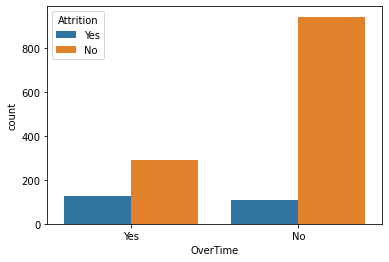

In [95]:
sns.countplot(x = "OverTime",hue="Attrition",data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

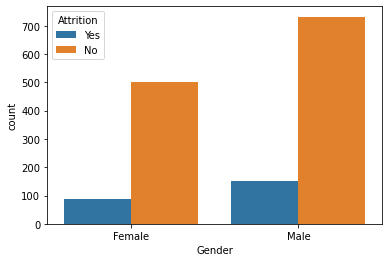

In [97]:
sns.countplot(x = "Gender",hue="Attrition",data = df)

#### Observation:
    1. In terms of gender Attriton is higher is males than that of females
    2. In terms of overtime Attriton is higher for those who do overtime 
    3. In terms of JobRole Attriton in higher for Sales Executive, Research Scientist, Laboratory Technician,
       Sales Representative
    4. In terms of EducationField is highest for LifeSciences
    5. In terms of Department Attriton is highst Research and Development
    6. In terms of BusinessTravel Attriton is highest for those who rearely travel
    8. In terms of Marital Status Attriton is highest for Singles
    

In [196]:
#convering categorical data to numerical data
#importing libraries
from sklearn.preprocessing import LabelEncoder


label= LabelEncoder()
df["Attrition"]=label.fit_transform(df["Attrition"])
df["BusinessTravel"]=label.fit_transform(df["BusinessTravel"])
df["Department"]=label.fit_transform(df["Department"])
df["EducationField"]=label.fit_transform(df["EducationField"])
df["Gender"]=label.fit_transform(df["Gender"])
df["JobRole"]=label.fit_transform(df["JobRole"])
df["MaritalStatus"]=label.fit_transform(df["MaritalStatus"])
df["OverTime"]=label.fit_transform(df["OverTime"])
df["Over18"]=label.fit_transform(df["Over18"])


In [197]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [198]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### MODEL AND EVALUATION

In [199]:
#seperating feature and target 
x=df.drop('Attrition',axis=1)#feature
y=df['Attrition']#target

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [201]:
#DEALING WITH IMBALANCED DATASET
from sklearn.utils import resample

In [202]:
X=pd.concat([x_train,y_train],axis=1)

In [203]:
No_Attr=X[X.Attrition==0]
Yes_Attr=X[X.Attrition==1]

In [204]:
Attr_upsampled=resample(Yes_Attr,
                       replace=True,
                       n_samples=len(No_Attr),
                       random_state=27)

In [205]:
upsampled=pd.concat([No_Attr,Attr_upsampled])

upsampled.Attrition.value_counts()

1    863
0    863
Name: Attrition, dtype: int64

Now the data is balanced

MODELS AND EVALUATION

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
log_reg=LogisticRegression()

In [241]:
log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [242]:
y_pred=log_reg.predict(x_test)

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
rand_clf=RandomForestClassifier(random_state=41)

In [215]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [216]:
rand_clf.score(x_test,y_test)

0.8616780045351474

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
knn=KNeighborsClassifier()

In [219]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [220]:
knn.score(x_test,y_test)

0.8049886621315193

In [223]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [224]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [227]:
clf.score(x_train,y_train)

1.0

In [228]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [245]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8390022675736961

In [247]:
auc=roc_auc_score(y_test,y_pred)

fpr,tpr,thresholds=roc_curve(y_test,y_pred)


In [248]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[370,   0],
       [ 71,   0]], dtype=int64)

In [249]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [250]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

NameError: name 'grid_param' is not defined

In [258]:
grid_param={'n_estimators:[90,100,115]','criterion'['gini','entropy'],'max_depth'(range[2,20,1]),'min_samples_leaf'
            (range[1,10,1]),'mini_samples_split'(range[2,10,1]),'max_feature:['auto','log2',]}

SyntaxError: invalid syntax (<ipython-input-258-806ee42fd953>, line 2)